In [2]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


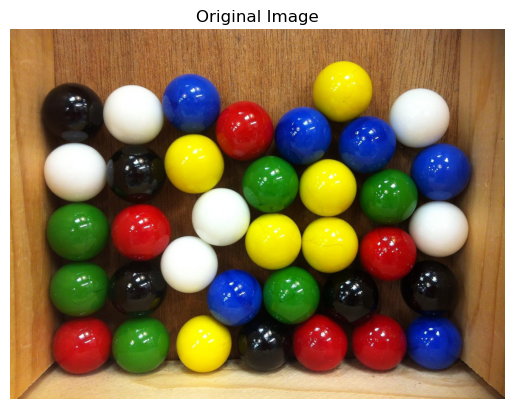

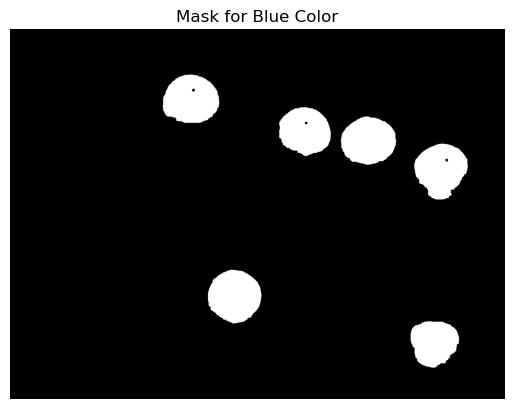

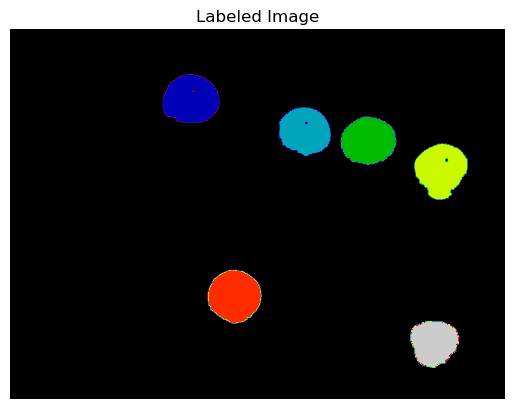

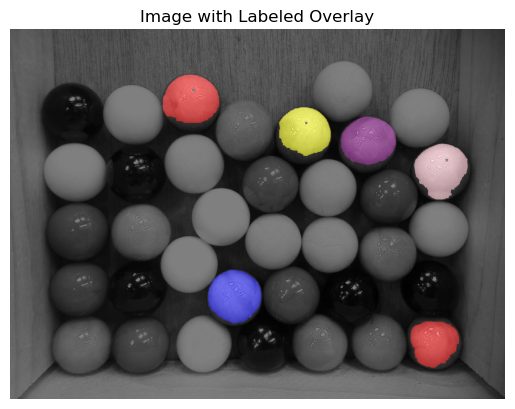

   label     area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0      1  19630.0           158.093935         28.328833         57.864442   
1      2  17656.0           149.934377         16.488956         51.322780   
2      3  18776.0           154.616770         16.396144         46.473903   
3      4  19522.0           157.658436         20.637025         50.937865   
4      5  20005.0           159.596858         20.397451         54.792052   

   mean_intensity-2  solidity  
0        169.568263  0.975501  
1        169.319891  0.972997  
2        159.823392  0.980009  
3        156.965014  0.958229  
4        174.348763  0.981359  


In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure
from scipy import ndimage as nd
from skimage.color import label2rgb
import pandas as pd

# Load the image
img = io.imread('C:\\Users\\Admin\\Downloads\\marbles.jpg')

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Define mask for blue color (fine-tuned ranges)
mask = cv2.inRange(hsv, (90, 100, 100), (120, 255, 255))  # Adjusted for better accuracy

# Apply morphological operations to improve the mask
kernel = np.ones((7, 7), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Mask for Blue Color')
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Label the connected regions
label_image = measure.label(mask)

# Display the labeled image
plt.imshow(label_image, cmap='nipy_spectral')
plt.title('Labeled Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Color label overlay on the original image with transparency
image_label_overlay = label2rgb(label_image, image=img, bg_label=0, alpha=0.5, colors=['red', 'yellow', 'purple', 'pink', 'blue'])

# Display the overlay image
plt.imshow(image_label_overlay)
plt.title('Image with Labeled Overlay')
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Compute image properties
props = measure.regionprops_table(label_image, img, properties=['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity'])

# Create a DataFrame with the properties
df = pd.DataFrame(props)
print(df.head())